In [8]:
import os
os.chdir("../src")
from tool_preprocess_onehot import preprocesing_function_onehot
os.chdir("../data")
import pandas as pd
df = pd.read_csv("quejas-clientes.csv", low_memory=False)
df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
df

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


Queremos predecir si tendra una timely response o no.
Segyun el EDA la compañia no tiene importancia, 
tampoco tiene sentido que dejemos las quejas que esten en progreso.


In [10]:
df["Consumer disputed?"].fillna("unknown", inplace=True)

C:\Users\unaif\AppData\Local\Temp\ipykernel_20328\1677353787.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Consumer disputed?"].fillna("unknown", inplace=True)


In [11]:
df["Consumer disputed?"].unique()

array(['unknown', 'Yes', 'No'], dtype=object)

In [12]:
df=df.drop(columns=["Company", "Date received",	"Date sent to company" ])
df=df[df["Company response"]!="In progress"]
df=df[df["Consumer disputed?"]!="unknown"]

In [13]:
df.drop(columns=["Complaint ID"], inplace=True)
df

,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Company response,Timely response?,Consumer disputed?
2,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,Closed with explanation,Yes,Yes
6,Consumer loan,Installment loan,Managing the loan or lease,NaN,OH,44241.0,Closed with explanation,Yes,Yes
9,Debt collection,Payday loan,Taking/threatening an illegal action,Threatened arrest/jail if do not pay,TX,77433.0,Closed with explanation,Yes,Yes
14,Debt collection,"Other (phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,UT,84405.0,Closed with non-monetary relief,Yes,Yes
22,Debt collection,NaN,Improper contact or sharing of info,Contacted me after I asked not to,IL,60411.0,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...
28149,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,MI,48622.0,Closed with explanation,Yes,No
28150,Credit card,NaN,Late fee,NaN,AR,72160.0,Closed with monetary relief,Yes,No
28151,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,Closed with non-monetary relief,Yes,No
28153,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,Closed with non-monetary relief,Yes,No


In [15]:
df_processed = preprocesing_function_onehot(df)
df_processed.drop(columns=["Consumer disputed?"], inplace=True)
df_processed.head()

c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess_onehot.py:373: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ZIP code"].fillna(000, inplace=True)
c:\Users\unaif\OneDrive\Documentos\Documentos_Clase_Data\PROYECTOS\nombre_proyecto_final_ML\Projecto-Final-ML\src\tool_preprocess_onehot.py:376: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change 

,ZIP code,Timely response?,Product_Bank account or service,Product_Consumer loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,State_TX,State_UT,State_Unknown,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
2,2127,1,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
6,44241,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,77433,1,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
14,84405,1,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
22,60411,1,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6006 entries, 2 to 28155
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             6006 non-null   object 
 1   Sub-product         3736 non-null   object 
 2   Issue               6006 non-null   object 
 3   Sub-issue           2778 non-null   object 
 4   State               5930 non-null   object 
 5   ZIP code            5963 non-null   float64
 6   Company response    6006 non-null   object 
 7   Timely response?    6006 non-null   object 
 8   Consumer disputed?  6006 non-null   object 
dtypes: float64(1), object(8)
memory usage: 598.3+ KB


In [17]:
X=df_processed.drop(columns=["Timely response?"])

In [20]:
y=df_processed["Timely response?"]

In [21]:
from imblearn.over_sampling import ADASYN

In [22]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 24)

In [24]:
X_train

,ZIP code,Product_Bank account or service,Product_Consumer loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,State_TX,State_UT,State_Unknown,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY
4401,32159,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1357,94606,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256,30010,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3415,33905,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5322,80306,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5249,78701,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
10385,96054,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3473,22554,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8535,92039,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
y_train.unique()

array([1, 0])

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn_class1=KNeighborsClassifier()

In [28]:
range(1,15)

range(1, 15)

In [29]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_neighbors":list(range(5,100,5)),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]

}

knn = GridSearchCV(estimator = knn_class1,
                  param_grid = parameters,
                  n_jobs = -1,
                  cv = 10,
                  scoring="accuracy", 
                  refit=True)

In [30]:

knn.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                         55, 60, 65, 70, 75, 80, 85, 90, 95],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [31]:
results = pd.DataFrame(knn.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084314,0.027496,6.533974,0.249114,auto,5,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1...",0.751050,...,0.769958,0.759454,0.771008,0.774160,0.802521,0.777311,0.781513,0.774160,0.012942,153
1,0.113345,0.031243,6.342684,0.445933,auto,5,1,distance,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1...",0.781513,...,0.802521,0.777311,0.797269,0.802521,0.826681,0.813025,0.800420,0.799370,0.013485,6
2,0.098030,0.028499,0.629347,0.103121,auto,5,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2...",0.748950,...,0.755252,0.754202,0.774160,0.763655,0.785714,0.760504,0.771008,0.765441,0.010795,157
3,0.104948,0.018607,0.594467,0.068490,auto,5,2,distance,"{'algorithm': 'auto', 'n_neighbors': 5, 'p': 2...",0.784664,...,0.783613,0.767857,0.788866,0.795168,0.807773,0.789916,0.788866,0.786975,0.009963,83
4,0.109316,0.021791,6.340293,0.318461,auto,10,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 10, 'p': ...",0.746849,...,0.761555,0.744748,0.747899,0.758403,0.794118,0.765756,0.764706,0.760399,0.013324,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.085574,0.007937,0.534772,0.075827,brute,90,2,distance,"{'algorithm': 'brute', 'n_neighbors': 90, 'p':...",0.772059,...,0.785714,0.753151,0.780462,0.784664,0.803571,0.782563,0.798319,0.780987,0.013454,145
300,0.112331,0.053683,4.715811,0.205671,brute,95,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 95, 'p':...",0.681723,...,0.711134,0.705882,0.706933,0.714286,0.718487,0.711134,0.738445,0.711450,0.013221,297
301,0.092202,0.015196,4.000680,0.777103,brute,95,1,distance,"{'algorithm': 'brute', 'n_neighbors': 95, 'p':...",0.776261,...,0.787815,0.767857,0.784664,0.781513,0.799370,0.785714,0.803571,0.786239,0.010252,95
302,0.094221,0.035675,0.547925,0.025181,brute,95,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 95, 'p':...",0.681723,...,0.710084,0.706933,0.706933,0.713235,0.718487,0.710084,0.736345,0.711239,0.012748,301


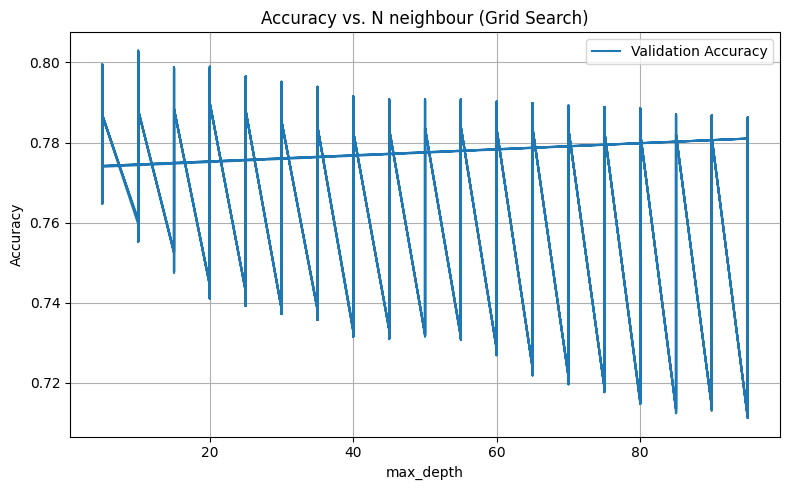

In [32]:

results = pd.DataFrame(knn.cv_results_)
results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(results['param_n_neighbors'], results['mean_test_score'],  label='Validation Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. N neighbour (Grid Search)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [33]:
knn_class_def=KNeighborsClassifier(**knn.best_params_)

In [34]:
knn_class_def.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1, weights='distance')

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = (knn_class_def.predict_proba(X_test)[:, 1] >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred, normalize='true'))


Accuracy: 0.795798319327731
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1208
           1       0.80      0.79      0.79      1172

    accuracy                           0.80      2380
   macro avg       0.80      0.80      0.80      2380
weighted avg       0.80      0.80      0.80      2380

Confusion Matrix:
[[0.80463576 0.19536424]
 [0.21331058 0.78668942]]


In [36]:
from sklearn.model_selection import cross_validate
cross_val=cross_validate(knn_class_def, X_train, y_train, cv=10)["test_score"]

print(cross_val.mean())
print(cross_val.std())

0.8029411764705883
0.013745662019290426


In [37]:
import os 
import pickle
os.chdir("../models")

with open('modelo_timely_knn.pkl', 'wb') as f:
    pickle.dump(knn_class_def, f)